In [34]:


import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import imageio


m1 = np.ones((5,5))

m1[0,2] = -1
print(m1)

[[ 1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


In [2]:

def atualiza_matrix(matrix):
    m2 = np.zeros_like(matrix)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if i ==0: #Primeira linha
                if j == 0: # Primeira coluna
                    m2[i,j] = matrix[i+1,j]* matrix[i,j+1]
                elif j==4: #Ultima coluna
                    m2[i,j] = matrix[i+1,j]* matrix[i, j-1]
                else:
                    m2[i,j] = matrix[i+1,j]* matrix[i, j-1]* matrix[i, j+1]


            elif i== 4: #Ultima linha
                if j == 0: # Primeira coluna
                    m2[i,j] = matrix[i-1,j]* matrix[i,j+1]
                elif j==4: #Ultima coluna
                    m2[i,j] = matrix[i-1,j]* matrix[i, j-1]
                else:
                    m2[i,j] = matrix[i-1,j]* matrix[i, j-1]* matrix[i, j+1]
            else:
                if j == 0: # Primeira coluna
                    m2[i,j] = matrix[i-1,j]* matrix[i+1,j] * matrix[i,j+1]
                elif j==4: #Ultima coluna
                    m2[i,j] = matrix[i-1,j]*  matrix[i+1,j] *matrix[i, j-1]
                else:
                    m2[i,j] = matrix[i-1,j]*  matrix[i+1,j] *matrix[i, j-1]* matrix[i, j+1]
    return(m2)



In [3]:

def update_matrix_vectorized(matrix):
    """
    Updates the matrix where each cell is the product of its neighbors 
    (Up * Down * Left * Right).
    
    Boundary cells use '1' for missing neighbors.
    """
    # 1. Pad the matrix with 1s around the border
    # mode='constant', constant_values=1 ensures edge multiplication works (x * 1 = x)
    padded = np.pad(matrix, pad_width=1, mode='constant', constant_values=1)
    
    # 2. Slice the padded matrix to get neighbor views
    # padded is (rows+2, cols+2)
    
    # Up:    Rows 0 to -2, Cols 1 to -1
    up = padded[:-2, 1:-1]
    
    # Down:  Rows 2 to end, Cols 1 to -1
    down = padded[2:, 1:-1]
    
    # Left:  Rows 1 to -1, Cols 0 to -2
    left = padded[1:-1, :-2]
    
    # Right: Rows 1 to -1, Cols 2 to end
    right = padded[1:-1, 2:]
    
    # 3. Multiply all views element-wise
    # This happens instantly for the whole matrix
    return up * down * left * right


In [35]:

def plot_matrix(m, i):
    fig, ax = plt.subplots()
    im = ax.imshow(m, cmap=custom_cmap, interpolation='nearest')
    ax.set_title(f"Iteração {i}")
    plt.show()

    filename = f'Imagens/matrix_{i}.png'
    fig.savefig(filename)
    images.append(imageio.imread(filename))

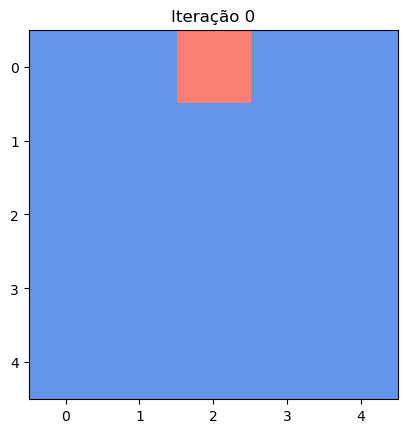

C:\Users\arnaldo.gunzi\AppData\Local\Temp\ipykernel_3532\1534776096.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


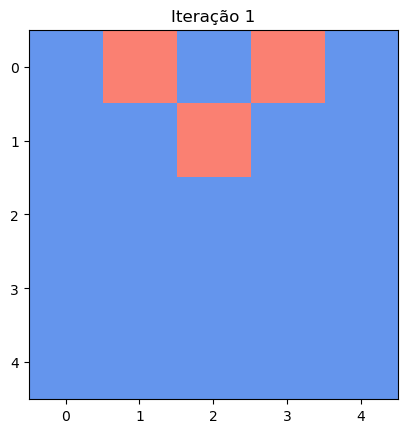

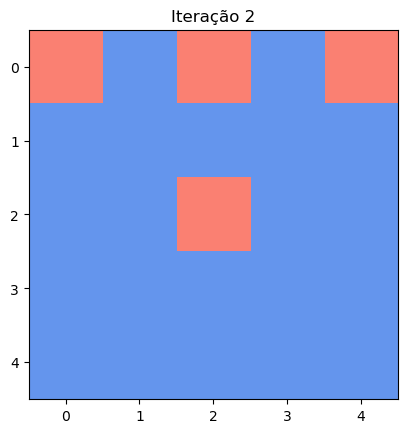

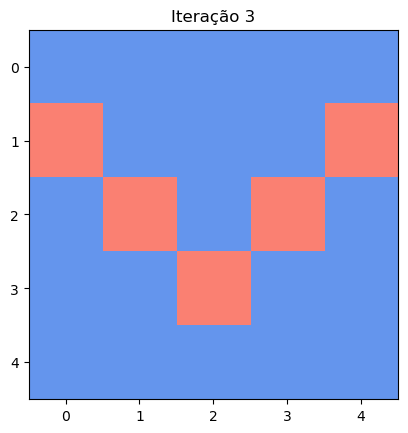

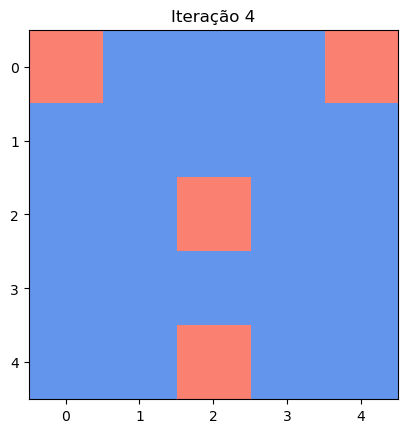

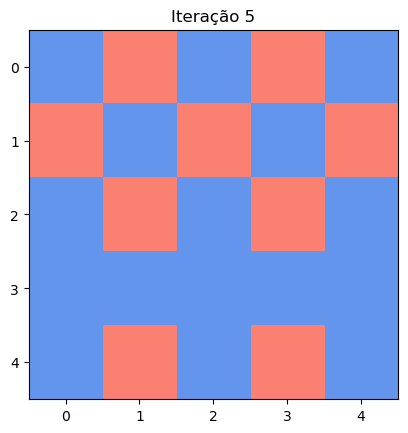

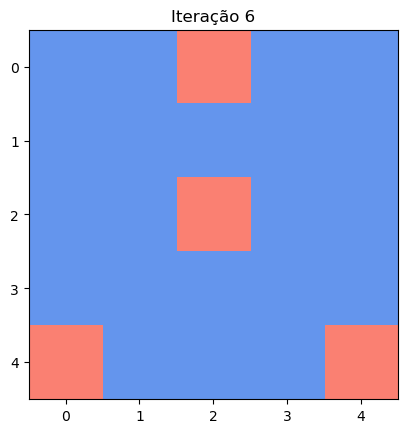

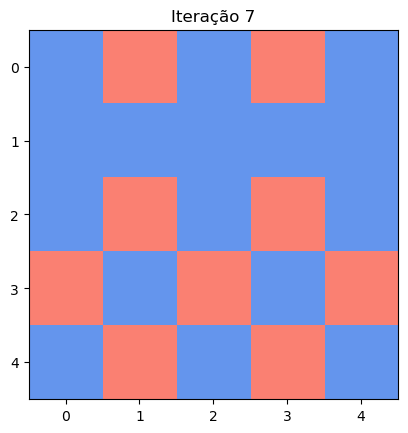

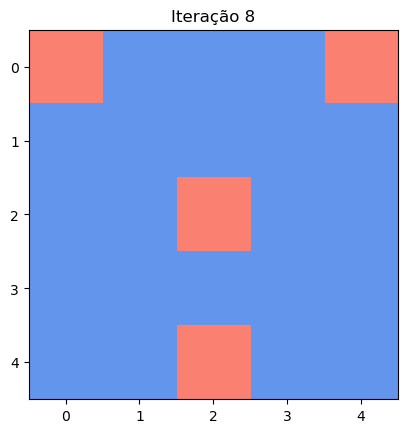

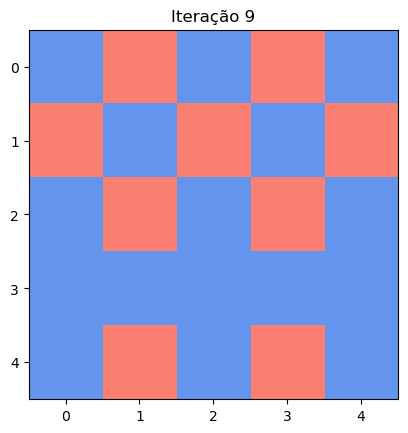

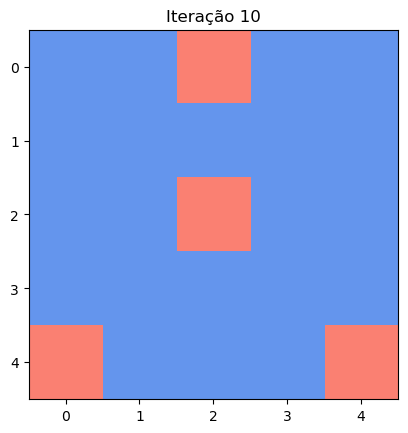

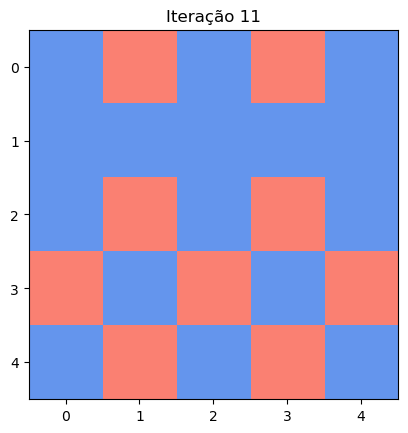

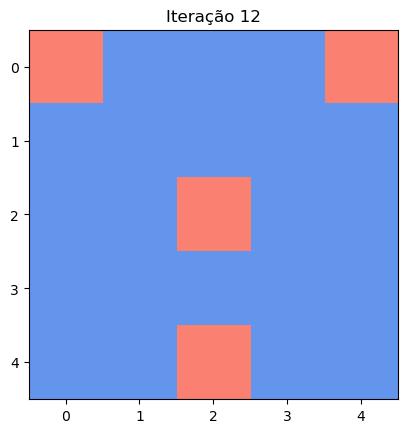

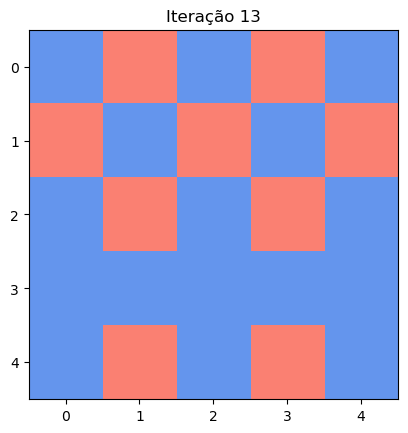

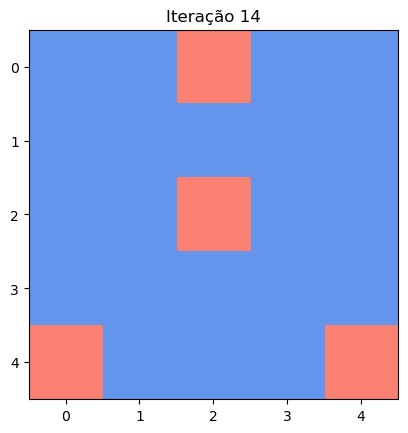

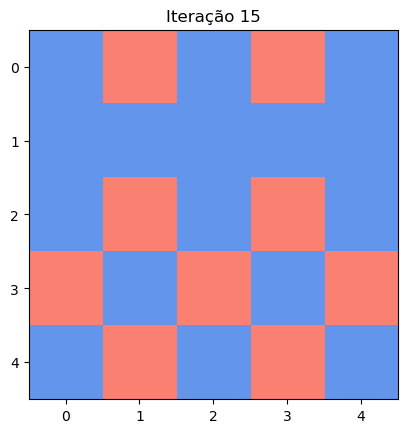

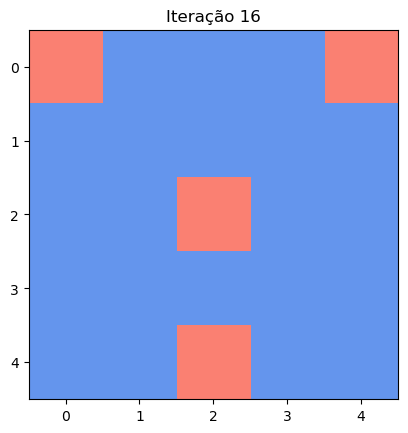

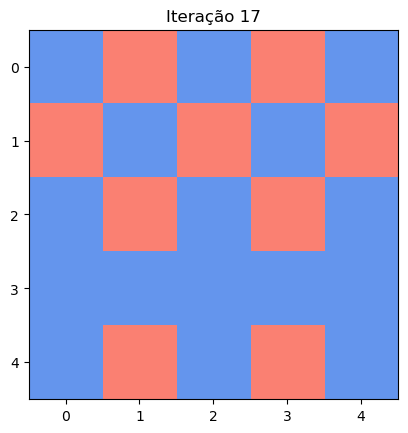

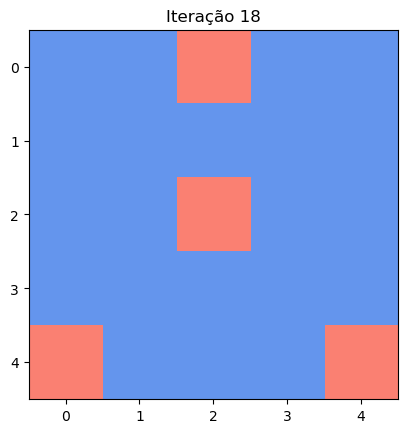

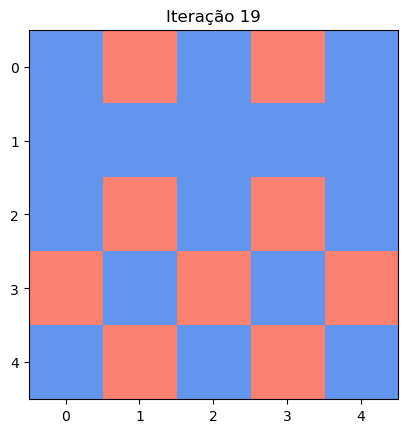

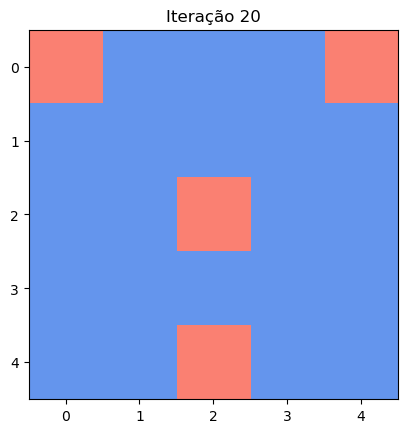

In [ ]:
#Inicializa
my_colors = ['salmon', 'cornflowerblue'] # You can use Hex codes too like '#FF0000'
custom_cmap = ListedColormap(my_colors)
images = []

m1 = np.ones((5,5))
m1[0,2] = -1
plot_matrix(m1, 0)

iter =20

for i in range(iter):
    m2 = update_matrix_vectorized(m1)
    m1 = m2.copy()
    plot_matrix(m1, i+1)

imageio.mimsave('matrix.gif', images, fps=1.0, loop = 0)